HyperTS is the DataCanvas Automatic Toolkit (DAT) tool chain, relying on [Hypernets](https://github.com/DataCanvasIO/Hypernets)-derived full Pipeline automatic toolkit for time series analysis. It follows the usage of ```make_expriment``` (similar to the API of [HyperGBM](https://github.com/DataCanvasIO/HyperGBM), an AutoML toolit for structured tabular data), and also conforms to the usage specification of the model API in ```scikit-learn```. We can create a ```make_expriment```, ```run``` and get a pipeline_model, which is a final optimized estimator, and then use its ```predict```, ```evaluate```, and ```plot``` to analyze unknown data.

HyperTS can be used to solve time series forecasting, classification and regression tasks, and they share a unified API. Next, we will divide into a quick demonstration of how to use it for time series forecasting and classification tasks.

### 1. Forecast Case

#### 1.1 Prepare Dataset

If you have doubts about the data format of HyperTS, please refer to the introduction in [01_datatypes_for_hyperts.ipynb](https://github.com/DataCanvasIO/HyperTS/blob/main/examples/01_datatypes_for_hyperts.ipynb).

In [1]:
from hyperts.datasets import load_network_traffic
from sklearn.model_selection import train_test_split

In [2]:
df = load_network_traffic()
train_data, test_data = train_test_split(df, test_size=168, shuffle=False)

Due to the temporal order of the data, in order to prevent information leakage, we split a part from the back of the overall data set, so ```shuffle=False```.

In this case dataset, we expose some basic information for reference, as follows:

- time column: 'TimeStamp';
- target columns: ['Var_1', 'Var_2', 'Var_3', 'Var_4', 'Var_5', 'Var_6'];
- covariate columns: ['HourSin', 'WeekCos', 'CBWD'];
- freq: 'H'.

#### 1.2 Create Experiment and Run

We search for a time series model by creating ```make_experiment```, and call the ```run()``` method to perform the experiment.

In [3]:
from hyperts import make_experiment

In [4]:
experiment = make_experiment(train_data=train_data.copy(),
                             task='forecast',
                             mode='dl',
                             timestamp='TimeStamp',
                             covariables=['HourSin', 'WeekCos', 'CBWD'])
model = experiment.run()

**Note**

In the forecasting task, we must pass the parameter ```timestamp``` column name to ```make_experiment```. If there are covariates, we also need to pass in the covariables column name.

Therefore, in this case, we need to pass the following parameters to ```make_experiment```:

1. Task type, ```task='forecast'```;
2. Time column name, ```timestamp='TimeStamp'```;
3. Covariate column name (ignore if not), ```covariables=['HourSin', 'WeekCos', 'CBWD']```;
4. If you want to obtain powerful performance, you can also modify other default parameters. For details, please refer to the parameter introduction in ```make_experiment```.

#### 1.3 Print Pipeline Model

In [5]:
model.get_pipeline_params()

<bound method Pipeline.get_params of Pipeline(steps=[('data_preprocessing',
                 TSFDataPreprocessStep(covariate_cols=['HourSin', 'WeekCos',
                                                       'CBWD'],
                                       covariate_data_clean_args={'correct_object_dtype': False,
                                                                  'drop_columns': None,
                                                                  'drop_constant_columns': True,
                                                                  'drop_duplicated_columns': False,
                                                                  'drop_idness_columns': True,
                                                                  'drop_label_nan_rows': True,
                                                                  'int_convert_to': 'float',
                                                                  'nan_chars': None,
                                 

#### 1.4 Infer

Split the test data into X and y, and call the ```predict()``` method to infer.

In [6]:
X_test, y_test = model.split_X_y(test_data.copy())
forecast = model.predict(X_test)
forecast.head()

,TimeStamp,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6
2710,2021-06-23 19:00:00,1.580599,5.803027,6.339262,1.997845,68466.254953,3.615938e+05
2711,2021-06-23 20:00:00,2.564713,6.819843,19.643646,1.815659,25322.043751,2.768165e+05
2712,2021-06-23 21:00:00,2.436701,6.414492,11.427074,2.403198,268767.957348,8.900508e+05
2713,2021-06-23 22:00:00,2.444191,5.274575,9.378210,2.924055,53885.514664,1.774984e+06
2714,2021-06-23 23:00:00,2.276460,6.358713,7.335743,2.060555,118858.325416,9.228722e+05


#### 1.5 Evaluation

Call the ```evaluate``` method to perform the result evaluation, and we can observe the score under each evaluation indicator.

Some default metrics scores will be returned here. If you want to observe the scores of the specified metrics, you can set the parameter metrics, such as ```metrics=['mae', 'mse', mape_func]```.

Where, mape_func can be a custom evaluation function or an evaluation function from sklearn.

In [7]:
results = model.evaluate(y_true=y_test, y_pred=forecast)
results

,Metirc,Score
0,mae,143558.9729
1,mse,179856088528.9392
2,rmse,194672.5783
3,mape,0.5269
4,smape,0.5107


#### 1.6 Visualization

Call the ```plot()``` method to visualize, take a look at the forecast curve, and compare it with the actual curve.

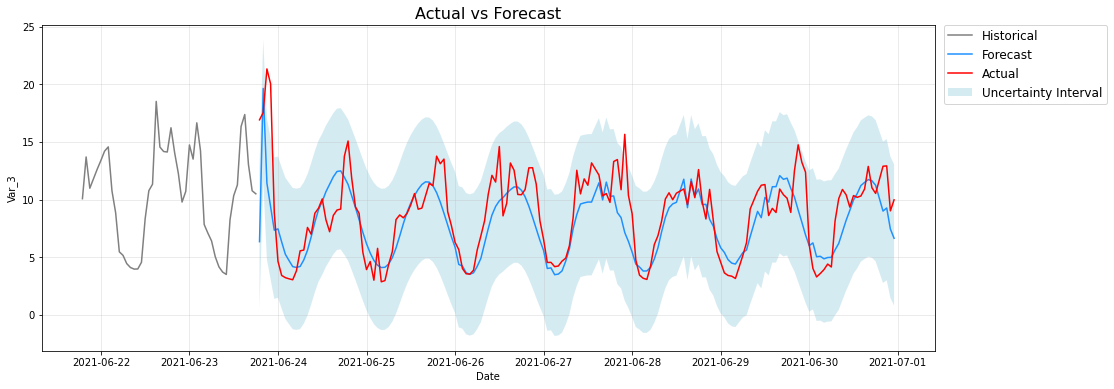

In [8]:
model.plot(forecast=forecast, actual=test_data, var_id='Var_3', interactive=False)

**Note**

- Only the forecat curve of one variable will be displayed here, which defaults to the first target variable;
- For multivariate forecasting task, if we want to observe other target variable curve, you can modify the parameter ```var_id```. For example: var_id=2 (i.e., index) or var_id='Var_2' (i.e., name);
- ```plot``` supports interactive visualization by changing ```interactive=False```(default， need to install plotly);
- To plot longer-term historical information, set the parameter ```history=sub_train_data```.

#### 1.7 Save model

Call the ```save()``` method to save the trained model.

In [ ]:
model.save(model_file="./xxx/xxx/models")

#### 1.8 Load model

Call the ```load_model()``` method to load the saved model. Note the path.

In [ ]:
from hyperts.utils.models import load_model

In [ ]:
pipeline_model = load_model(model_file="./xxx/xxx/models/stats_models")

<br>

<br>

### 2. Classification Case

#### 1.1 Prepare Dataset

If you have doubts about the data format of HyperTS, please refer to the introduction in [01_datatypes_for_hyperts.ipynb](https://github.com/DataCanvasIO/HyperTS/blob/main/examples/01_datatypes_for_hyperts.ipynb).

In [1]:
from hyperts.datasets import load_basic_motions
from sklearn.model_selection import train_test_split

In [2]:
df = load_basic_motions()
train_df, test_df = train_test_split(df, test_size=0.2)

In this case dataset, we expose some basic information for reference, as follows:

- feature columns: ['Var_1', 'Var_2', 'Var_3', 'Var_4', 'Var_5', 'Var_6'];
- target column: 'target'.

#### 1.2 Create Experiment and Run

We search for a time series model by creating ```make_experiment```, and call the ```run()``` method to perform the experiment.

In [3]:
from hyperts import make_experiment

In [4]:
experiment = make_experiment(train_data=train_df.copy(), task='classification', mode='stats', target='target')

model = experiment.run()

#### 1.3 Print Pipeline Model

In [5]:
model.get_pipeline_params()

<bound method Pipeline.get_params of Pipeline(steps=[('data_preprocessing',
                 TSCDataPreprocessStep(data_cleaner_args={'drop_label_nan_rows': True},
                                       name='data_preprocessing')),
                ('estimator',
                 <hyperts.hyper_ts.HyperTSEstimator object at 0x000001CDC2318C18>)])>

#### 1.4 Infer

Split the test data into X and y, and call the ```predict()``` method to infer.

In [6]:
X_test, y_test = model.split_X_y(test_df.copy())
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [7]:
y_pred

array(['badminton', 'walking', 'standing', 'badminton', 'walking',
       'walking', 'walking', 'badminton', 'standing', 'running',
       'badminton', 'walking', 'walking', 'running', 'standing',
       'standing'], dtype=object)

#### 1.5 Evaluation

Call the ```evaluate``` method to perform the result evaluation, and we can observe the score under each evaluation indicator.

Some default metrics scores will be returned here. If you want to observe the scores of the specified metrics, you can set the parameter metrics, such as ```metrics=['accuracy', 'auc', f1_func]```.

Where, mape_func can be a custom evaluation function or an evaluation function from sklearn.

In [8]:
results = model.evaluate(y_true=y_test, y_pred=y_pred, y_proba=y_proba)
results

,Metirc,Score
0,accuracy,1.0000
1,f1,1.0000
2,precision,1.0000
3,recall,1.0000


#### 1.6 Save model

Call the ```save()``` method to save the trained model.

In [ ]:
from hyperts.utils.models import save_model

save_model(model=model, model_file="./xxx/xxx/models")